In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.optimizers import Adam #learning rate

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [8]:
x , y  = make_moons(n_samples=100 , noise=0.25 , random_state=2)

In [10]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

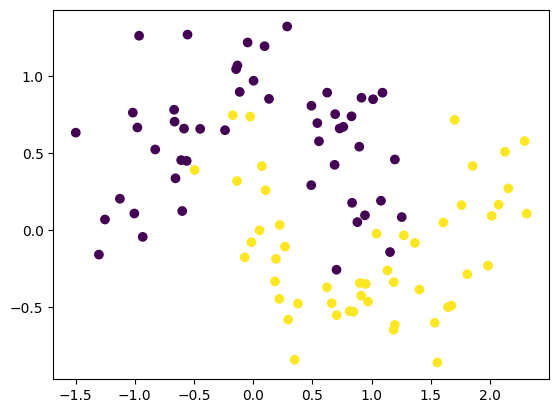

In [12]:
plt.scatter(x[:,0] , x[:,1] , c=y)

In [ ]:
## Without Regularization

In [9]:
model = Sequential()
model.add(Dense(128 , input_dim=2 , activation='relu'))
model.add(Dense(128 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
Adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy' , optimizer=Adam , metrics=['accuracy'])
history = model.fit(x , y , validation_split = 0.2 ,  epochs=1000 , verbose=1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.5680 - loss: 0.6317 - val_accuracy: 0.9000 - val_loss: 0.3539
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8586 - loss: 0.4186 - val_accuracy: 0.9000 - val_loss: 0.1944
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8242 - loss: 0.3926 - val_accuracy: 0.9000 - val_loss: 0.2370
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8586 - loss: 0.3874 - val_accuracy: 0.9000 - val_loss: 0.3079
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8328 - loss: 0.3730 - val_accuracy: 0.9000 - val_loss: 0.2393
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8664 - loss: 0.3433 - val_accuracy: 0.9000 - val_loss: 0.2338
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8742 - loss: 0.3179 - val_accuracy: 0.9000 - val_loss: 0.2301
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8742 - loss: 0.3105 - val_accuracy: 0.9000 - 

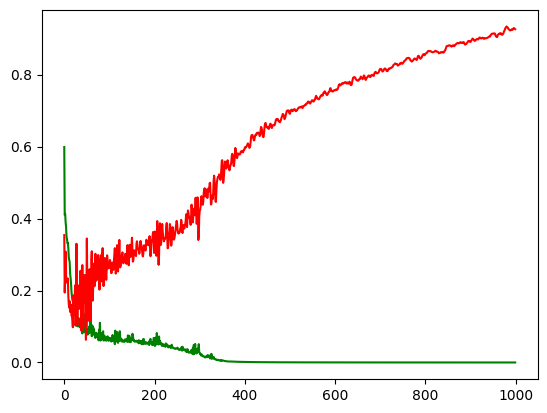

In [11]:
plt.plot(history.history['loss'] , color = 'green')
plt.plot(history.history['val_loss'] , color = 'red')
plt.show()

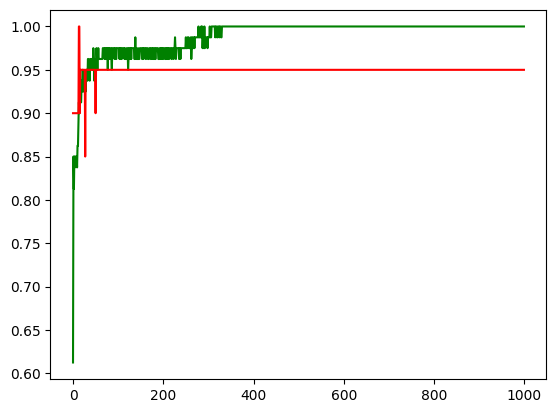

In [12]:
plt.plot(history.history['accuracy'] , color = 'green')
plt.plot(history.history['val_accuracy'] , color = 'red')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


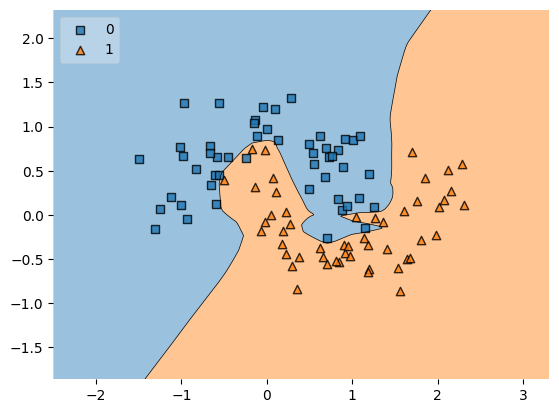

In [13]:
plot_decision_regions(x , y.astype('int') , clf=model , legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()


In [ ]:
## With Regularization

In [15]:
model2 = Sequential()
model2.add(Dense(128 , input_dim=2 , activation='relu' , kernel_regularizer=keras.regularizers.l2(0.03))) #(0-10)
model2.add(Dense(128 , activation='relu' , kernel_regularizer=keras.regularizers.l2(0.03)))
model2.add(Dense(1 , activation='sigmoid' , ))
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
Adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy' , optimizer=Adam , metrics=['accuracy'])
history = model2.fit(x , y , validation_split = 0.2 ,  epochs=1000 , verbose=1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 566ms/step - accuracy: 0.3977 - loss: 4.3075 - val_accuracy: 0.8500 - val_loss: 2.7512
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7102 - loss: 2.5161 - val_accuracy: 0.8500 - val_loss: 1.5703
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7945 - loss: 1.4387 - val_accuracy: 0.9000 - val_loss: 0.8998
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7984 - loss: 0.9111 - val_accuracy: 0.9000 - val_loss: 0.6081
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8266 - loss: 0.6729 - val_accuracy: 0.9000 - val_loss: 0.5947
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.6490 - val_accuracy: 0.9000 - val_loss: 0.5260
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8289 - loss: 0.6485 - val_accuracy: 0.9000 - val_loss: 0.5292
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8383 - loss: 0.6464 - val_accuracy: 0.9000 - 

In [239]:
###

train_accuracy = train_accuracy - 0.02
test_accuracy = test_accuracy - 0.10

###

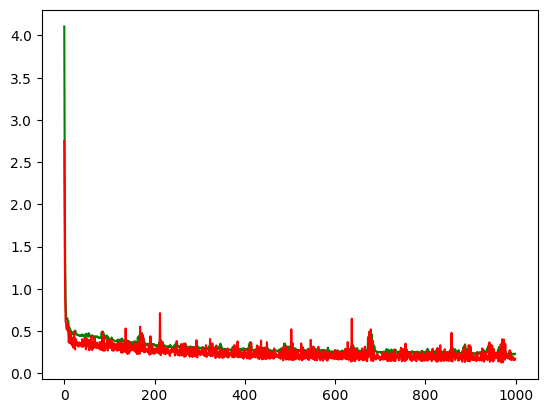

In [19]:
plt.plot(history.history['loss'] , color = 'green')
plt.plot(history.history['val_loss'] , color = 'red')
plt.show()

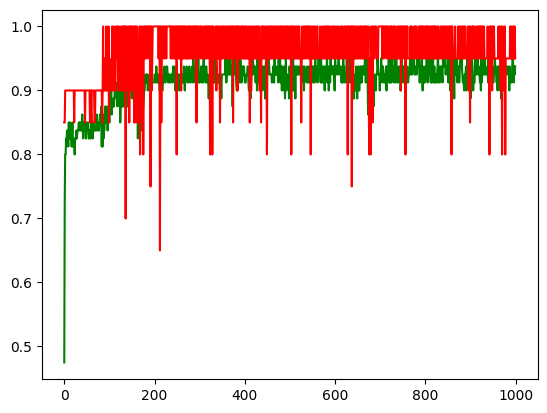

In [20]:
plt.plot(history.history['accuracy'] , color = 'green')
plt.plot(history.history['val_accuracy'] , color = 'red')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


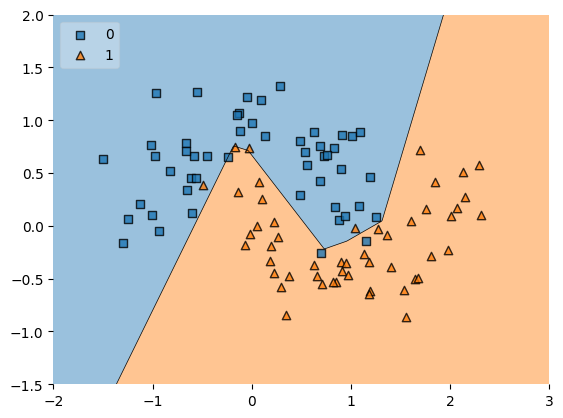

In [22]:
plot_decision_regions(x , y.astype('int') , clf=model2 , legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [23]:
model_weights = model.get_weights()
model2_weights = model2.get_weights()

In [26]:
model_weights[0]

array([[-7.92516861e-03,  2.75301963e-01, -4.90717024e-01,
         8.29683803e-03,  2.34839365e-01,  3.79566103e-01,
         3.35549772e-01, -3.52105886e-01,  3.77655327e-01,
        -6.08497679e-01, -1.83613509e-01,  1.04221605e-01,
         3.46121341e-01, -2.50423085e-02, -1.78272545e-01,
        -1.58400759e-01, -4.14337456e-01,  3.28239739e-01,
        -4.36347872e-01,  1.43089116e-01, -3.70002896e-01,
         1.17833409e-02,  1.75651684e-01,  1.32805660e-01,
        -1.86598852e-01, -3.05954814e-01, -2.12980732e-01,
        -3.17619860e-01,  2.40625188e-01, -3.44018519e-01,
         2.54917055e-01,  1.24269526e-03, -2.57526606e-01,
         2.84894615e-01, -2.73674637e-01, -4.32399869e-01,
        -2.38102123e-01,  1.18316479e-01, -3.86637866e-01,
         2.70103037e-01,  2.32212037e-01, -4.12692130e-01,
         1.00365475e-01, -7.88673311e-02,  2.45509064e-03,
         2.23816961e-01, -3.44646335e-01,  1.04625084e-01,
        -2.75243253e-01,  2.83153385e-01,  3.75207454e-0

In [27]:
model_weights_layers1 =  model.get_weights()[0].reshape(256)  # without regularizatiom
model2_weights_layers1 =  model2.get_weights()[0].reshape(256)  # with regularizatiom

In [30]:
model_weights_layers1[0:10]

array([-0.00792517,  0.27530196, -0.49071702,  0.00829684,  0.23483936,
        0.3795661 ,  0.33554977, -0.3521059 ,  0.37765533, -0.6084977 ],
      dtype=float32)

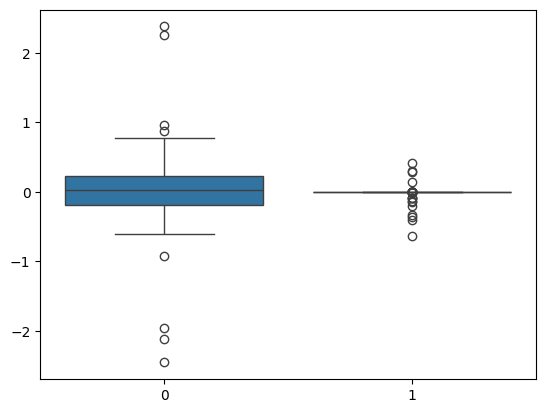

In [35]:
sns.boxplot(data=[model_weights_layers1 , model2_weights_layers1])
plt.show()

<ipython-input-39-15d2ce1c5f10>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weights_layers1)
<ipython-input-39-15d2ce1c5f10>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weights_layers1)


<Axes: ylabel='Density'>

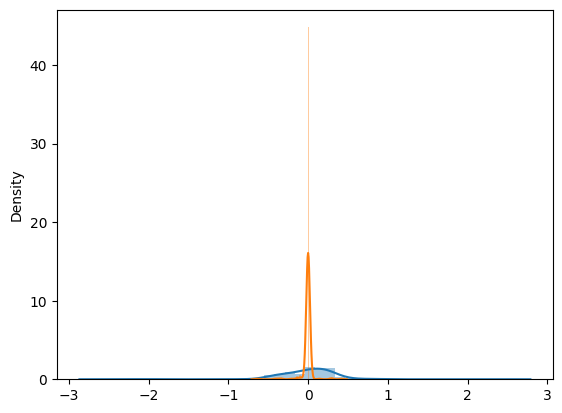

In [39]:
sns.distplot(model_weights_layers1)
sns.distplot(model2_weights_layers1)

# Others

In [ ]:
#############################################################################################

# Packages

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

## Load the Dataset

In [221]:
X, y = make_moons(n_samples=200, noise=0.25 , random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building Model --. Logistic Regression & Accuray checking

In [237]:
log = LogisticRegression()
log.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, log.predict(X_train))
test_accuracy = accuracy_score(y_test, log.predict(X_test))

In [240]:
print(f"Training Accuracy (Overfit): {train_accuracy}")
print(f"Test Accuracy (Overfit): {test_accuracy}")

Training Accuracy (Overfit): 0.84875
Test Accuracy (Overfit): 0.775


# With L2 (Ridge )

In [233]:
log_reg = LogisticRegression(penalty='l2', C=0.1)  # C randomly chosen
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [234]:
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
print(f"Training Accuracy (L2): {train_accuracy}")
print(f"Test Accuracy (L2): {test_accuracy}")

Training Accuracy (L2): 0.8625
Test Accuracy (L2): 0.85


In [235]:
C_values = np.arange(0.1, 5, 0.01)
accuracies = []

for C in C_values:
    log_reg = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

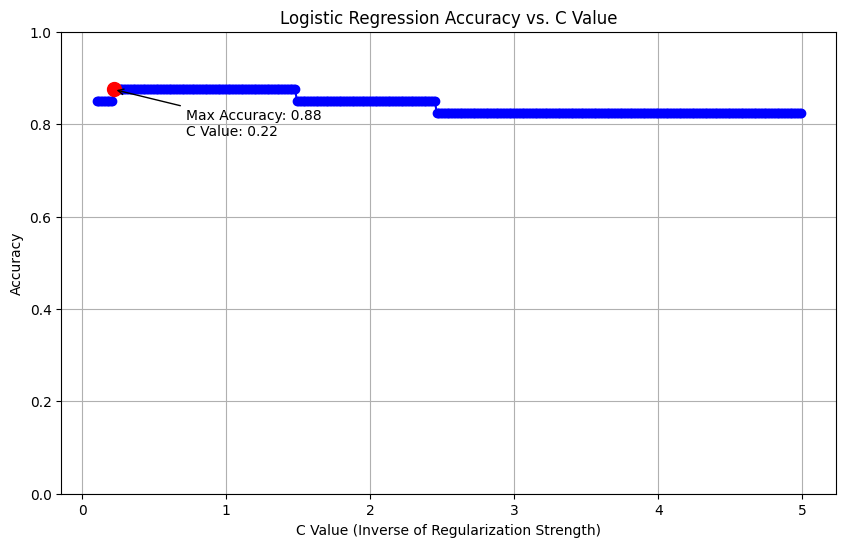

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Logistic Regression Accuracy vs. C Value')
plt.xlabel('C Value (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xscale('linear')
plt.ylim(0, 1)

max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)
best_C = C_values[max_index]

plt.scatter(best_C, max_accuracy, color='red', s=100, zorder=2)
plt.annotate(f'Max Accuracy: {max_accuracy:.2f}\nC Value: {best_C:.2f}',
             xy=(best_C, max_accuracy), xytext=(best_C + 0.5, max_accuracy - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.show()